Notes:
1. Duration needs to be used only for benchmarking purposes, corr of 0.41. Target output y is yes if duration is large enough.

In [79]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [80]:
# Load the data

df = pd.read_csv("C:\\Sem 4\\ML\\Project\\bank_data.csv")

# Drop duration
df.drop('duration', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [81]:
# Check if categorical columns have nulls
categorical = df.select_dtypes(include='object').columns

for x in categorical:
    if df[x].isnull().any() or (df[x] == 'unknown').any():
        print("There are nulls", x)
    else:
        print("No Nulls in", x)

# Check if numerical columns have nulls
categorical = df.select_dtypes(include=['int64', 'float64']).columns

for x in categorical:
    if df[x].isnull().any() or (df[x] == 'unknown').any():
        print("There are nulls", x)
    else:
        print("No Nulls in", x)

There are nulls job
There are nulls marital
There are nulls education
There are nulls default
There are nulls housing
There are nulls loan
No Nulls in contact
No Nulls in month
No Nulls in day_of_week
No Nulls in poutcome
No Nulls in y
No Nulls in age
No Nulls in campaign
No Nulls in pdays
No Nulls in previous
No Nulls in emp.var.rate
No Nulls in cons.price.idx
No Nulls in cons.conf.idx
No Nulls in euribor3m
No Nulls in nr.employed


In [82]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [83]:
# Print the unique values in the categorical columns to check if bad data exists
categorical = df.select_dtypes(include='object').columns

for x in categorical:
    print(f"{x}: {df[x].unique()}")

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


In [84]:
x = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'pdays']

for i in x:
    unknown_count = (df[i] == 'unknown').sum()
    print(f"{i}: {df[i].unique()}, Number of 'unknown': {unknown_count}")


job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'], Number of 'unknown': 330
marital: ['married' 'single' 'divorced' 'unknown'], Number of 'unknown': 80
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'], Number of 'unknown': 1731
default: ['no' 'unknown' 'yes'], Number of 'unknown': 8597
housing: ['no' 'yes' 'unknown'], Number of 'unknown': 990
loan: ['no' 'yes' 'unknown'], Number of 'unknown': 990
pdays: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20], Number of 'unknown': 0


In [85]:
unknown_rows = df[df.apply(lambda row: row.str.contains('unknown').any(), axis=1)]
unknown_rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
15,54,retired,married,basic.9y,unknown,yes,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,technician,married,unknown,no,yes,no,cellular,nov,tue,2,999,2,failure,-1.1,94.767,-50.8,1.046,4963.6,no
41120,60,admin.,married,unknown,no,no,no,cellular,nov,tue,2,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,no
41122,34,technician,married,unknown,no,no,no,cellular,nov,tue,3,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes
41135,54,technician,married,unknown,no,yes,no,cellular,nov,thu,1,999,1,failure,-1.1,94.767,-50.8,1.041,4963.6,no


In [86]:
x = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for column in x:
    mode_value = df[column].mode().iloc[0]  # .mode() returns a Series, use .iloc[0] to get the first mode
    unknown_count = (df[column] == 'unknown').sum()
    print(f"{column} - Mode:{mode_value}, Unknowns: {unknown_count}")

job - Mode:admin., Unknowns: 330
marital - Mode:married, Unknowns: 80
education - Mode:university.degree, Unknowns: 1731
default - Mode:no, Unknowns: 8597
housing - Mode:yes, Unknowns: 990
loan - Mode:no, Unknowns: 990


In [87]:
# Dropping records with unknowns in job and marital as they are small in number 

import pandas as pd

# Assuming your DataFrame is named df and the columns with 'unknown' values are 'col1', 'col2', 'col3'
columns_with_unknown = ['job', 'marital']

# Create a boolean mask for rows with 'unknown' values in any of the specified columns
filter = df[columns_with_unknown].apply(lambda col: col != 'unknown').all(axis=1)

# Filter the DataFrame to include only rows where the condition is True
df_filtered = df[filter]


# Assuming df2 is your DataFrame
target_column = 'default'

# Filter out instances with 'yes' as there were only 3 records with default = yes
df_filtered = df_filtered[df_filtered[target_column].isin(['no', 'unknown'])]

# Display the filtered DataFrame
df_filtered 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [88]:
import pandas as pd

# Label encoding for columns with >2 unique values
df2 = df_filtered.copy()
df2['job'].replace(['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 
                   'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student'],
                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                  inplace=True)
df2['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace= True)
df2['education'].replace(['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course',
 'unknown', 'university.degree', 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace= True)
df2['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace= True)
df2['poutcome'].replace(['nonexistent', 'failure', 'success'], [1, 2, 3], inplace= True)
df2['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'], [1, 2, 3, 4, 5], inplace= True)
df2['loan'].replace(['yes', 'no', 'unknown'], [1, 2, 3], inplace= True)
df2['housing'].replace(['yes', 'no', 'unknown'], [1, 2, 3], inplace= True)

# Binary encoding

df2['y'] = df2['y'].map({'no': 0, 'yes': 1})
df2['default'] = df2['default'].map({'no': 1, 'unknown': 0})
df2['contact'] = df2['contact'].map({'cellular': 1, 'telephone': 0})


df2


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,11,1,1,1,2,2,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,8,1,2,0,2,2,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,8,1,2,1,1,2,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,7,1,3,1,2,2,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,8,1,2,1,2,1,0,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,5,1,1,2,1,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,4,1,5,1,2,2,1,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,6,1,7,1,1,2,1,11,5,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,2,1,5,1,2,2,1,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [90]:
# Doing standardization using Z scores to handle outliers as seen in EDA code
def standardize_dataframe(df, columns_to_standardize):
    # Calculate mean and standard deviation for each specified column
    means = df[columns_to_standardize].mean()
    stds = df[columns_to_standardize].std()

    # Standardization formula: (X - mean) / std
    df_standardized = df.copy()
    df_standardized[columns_to_standardize] = (df[columns_to_standardize] - means) / stds

    return df_standardized

# Example usage
# Assuming df2 is your DataFrame
columns_to_standardize = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df2_standardized = standardize_dataframe(df2, columns_to_standardize)

# Display the original and standardized DataFrames
df2_standardized.tail()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,3.174431,6,1,5,1,1,2,1,11,5,-0.565787,0.194725,-0.349313,1,-0.751805,2.060543,-2.222681,-1.494104,-2.81608,1
41184,0.578849,4,1,5,1,2,2,1,11,5,-0.565787,0.194725,-0.349313,1,-0.751805,2.060543,-2.222681,-1.494104,-2.81608,0
41185,1.540175,6,1,7,1,1,2,1,11,5,-0.204539,0.194725,-0.349313,1,-0.751805,2.060543,-2.222681,-1.494104,-2.81608,0
41186,0.386584,2,1,5,1,2,2,1,11,5,-0.565787,0.194725,-0.349313,1,-0.751805,2.060543,-2.222681,-1.494104,-2.81608,1
41187,3.270563,6,1,5,1,1,2,1,11,5,0.156708,0.194725,1.671449,2,-0.751805,2.060543,-2.222681,-1.494104,-2.81608,0


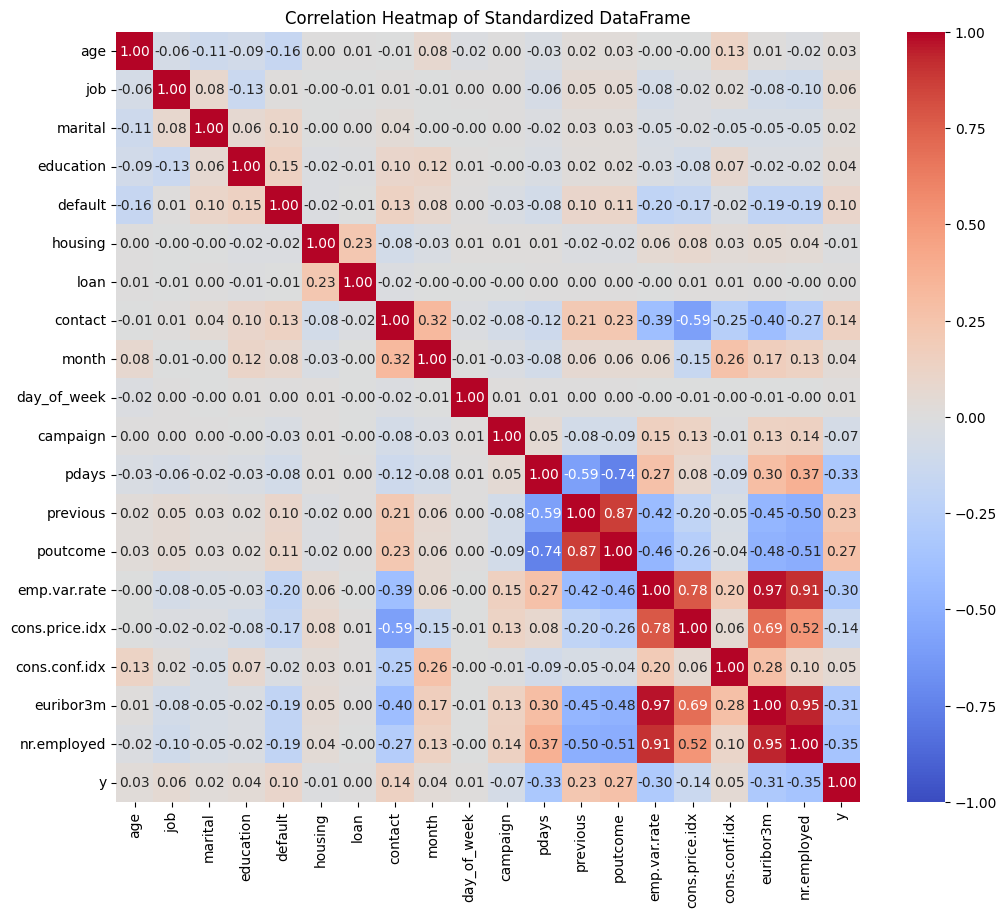

In [91]:
# Correlation analysis

# Q: Should we do Feature selection via correlation analysis?
# Ans: Need to discuss but if we do go ahead with this then
# Check if we need to set a threshold for correlation coeff of say 0.9 and drop columns that have >0.9


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df2_standardized is your standardized DataFrame
# You may want to adjust the size of the heatmap based on your needs
plt.figure(figsize=(12, 10))

# Calculate the correlation matrix
corr_matrix = df2_standardized.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Show the plot
plt.title('Correlation Heatmap of Standardized DataFrame')
plt.show()


In [92]:
# >>>>>> Read: Important notes <<<<<<<
# Implemented SMOTE and Logistic Regression directly from libraries -  accuracy of 78% (duration being dropped plays a huge role - was 86% with duration)
# We need to ask TAs if SMOTE can be done using library or else we need to figure out the code for SMOTE 
# Logistic Regression - use assignment code and do necessary tweaks

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have a DataFrame 'df' with features and target variable
# Replace 'your_target_column' with the actual name of your target column

# Separate features (X) and the target variable (y)
X = df2_standardized.drop('y', axis=1)
y = df2_standardized['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the number of samples before and after SMOTE
print("Number of samples before SMOTE:", len(X_train))
print("Number of samples after SMOTE:", len(X_train_resampled))

# You can now use X_train_resampled and y_train_resampled for model training

X_train, X_test, y_train, y_test = X_train_resampled, X_test, y_train_resampled, y_test

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())


Number of samples before SMOTE: 32627
Number of samples after SMOTE: 57926
[[5744 1483]
 [ 334  596]]
78.0
